## Importing Pckages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os

from tensorflow.keras.preprocessing import image_dataset_from_directory


# We need to import layers from keras to use different neural network layers. We can also import different layers individually as well.
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D, BatchNormalization, Activation

# Now we can import 'Sequential' model from keras, which is the base model in which we are adding the layers
from tensorflow.keras.models import Sequential

In [2]:
data_dir = os.getcwd()+'\\data\\'
data_cat = ["with_mask", "without_mask"]
data_dir

'C:\\Users\\prath\\Desktop\\Capstone\\Face Mask detection\\data\\'

In [3]:
for folders in os.listdir(data_dir):    
    #Storing each folder directory names
    folder_dir = data_dir+'\\'+folders
    
    # Getting the details of sub directories and files, Our main objective here is to check the number of files
    path, dirs, files = next(os.walk(folder_dir))
    file_count = len(files)
    print(folders.title()+' set, '+folders+' :'+str(file_count))

Without_Mask set, without_mask :3828
With_Mask set, with_mask :3725


In [4]:
batch_size = 40
target_size=(148, 148)

In [5]:
# Train Data
training_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset= "training",
    seed=1,
    image_size= target_size,
    batch_size=batch_size
)


## Test Data
testing_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset= "validation",
    seed=1,
    image_size= target_size,
    batch_size=batch_size
)

Found 7553 files belonging to 2 classes.
Using 6043 files for training.
Found 7553 files belonging to 2 classes.
Using 1510 files for validation.


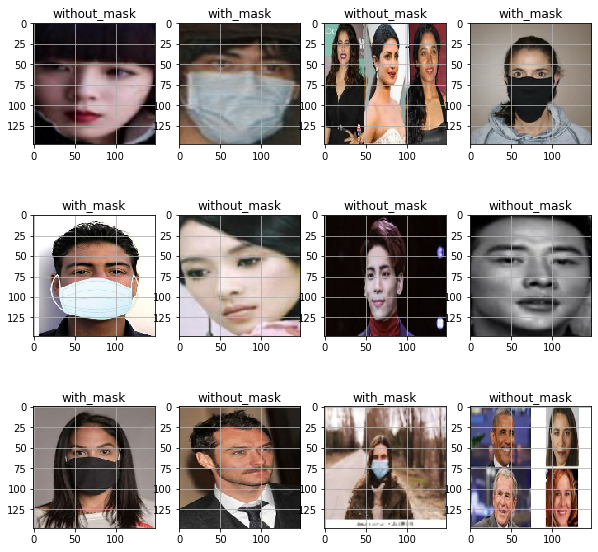

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(data_cat[labels[i]])
    plt.grid(True)

In [7]:
def cnn_model_init():
    
    input_shape = (148, 148, 3)    
    
    cnnModel = Sequential()
    
    cnnModel.add(Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'))
    cnnModel.add(BatchNormalization())
    cnnModel.add(MaxPooling2D(pool_size=(2, 2)))
    cnnModel.add(Dropout(0.4))

    
    cnnModel.add(Flatten())
    cnnModel.add(Dense(32, activation='relu'))
    cnnModel.add(Dropout(0.4))
    
    cnnModel.add(Dense(1, activation='sigmoid'))
    return cnnModel

In [8]:
cnnModel = cnn_model_init()

cnnModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 146, 146, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 146, 146, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 73, 73, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 170528)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                5456928   
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0

In [9]:
cnnModel.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
history = cnnModel.fit(
    training_ds,
    epochs=5,
    validation_data=testing_ds)

Epoch 1/5
152/152 [==============================] - 89s 577ms/step - loss: 3.7617 - accuracy: 0.7670 - val_loss: 0.4628 - val_accuracy: 0.8874
Epoch 2/5
152/152 [==============================] - 89s 585ms/step - loss: 0.3899 - accuracy: 0.8570 - val_loss: 0.6367 - val_accuracy: 0.8927
Epoch 3/5
152/152 [==============================] - 90s 589ms/step - loss: 0.3827 - accuracy: 0.8742 - val_loss: 0.2739 - val_accuracy: 0.8967
Epoch 4/5
152/152 [==============================] - 91s 594ms/step - loss: 0.2456 - accuracy: 0.8970 - val_loss: 0.2393 - val_accuracy: 0.9046
Epoch 5/5
152/152 [==============================] - 91s 596ms/step - loss: 0.2305 - accuracy: 0.9166 - val_loss: 0.3285 - val_accuracy: 0.9172


PLOTTING ACCURACY



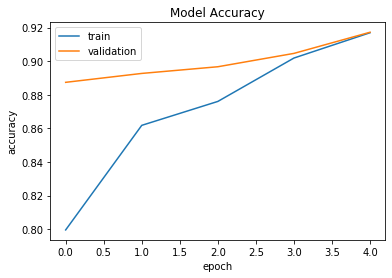

PLOTTING LOSS



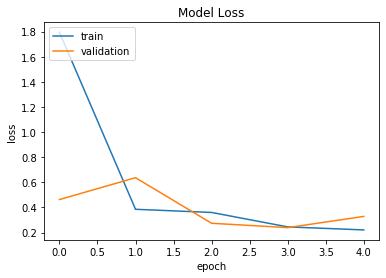

In [11]:
print("PLOTTING ACCURACY\n")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


print("PLOTTING LOSS\n")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
print("\n\n")

In [12]:
cnnModel.save("maskDetectorCNN.model", save_format="h5")

In [18]:
np.round(cnnModel.predict(testing_ds))

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)